In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from miniaudio import decode, SampleFormat
#import torchaudio
import parselmouth

In [54]:
def load_from_teanglann(word, dialect):
    valid_dialects = ['C', 'M', 'U']
    if dialect not in valid_dialects and dialect.upper()[0] not in valid_dialects:
        raise Exception(f'Dialect must be one of "C", "M" or "U"; got "{dialect}"')
    url = f'https://www.teanglann.ie/Can{dialect}/{word}.mp3'
    r = requests.get(url)
    if r.status_code != 200:
        raise Exception(f'Failed to fetch {url}')
    # https://github.com/pytorch/audio/issues/800
    decoded = decode(r.content, nchannels=1, sample_rate=16000, output_format=SampleFormat.SIGNED32)
    #decoded = decode(r.content)
    # waveform2, sample_rate2 = torchaudio.load(response.raw)
    return np.array(decoded.samples, dtype=np.int32).astype(np.float64).reshape((-1, decoded.nchannels))
    #return decoded
    

<class 'miniaudio.DecodedSoundFile'>


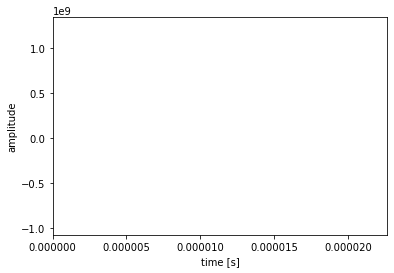

In [55]:
foo=load_from_teanglann('madra', 'M')
snd = parselmouth.Sound(values=foo)
#!wget 'https://www.teanglann.ie/CanM/madra.mp3'
#snd = parselmouth.Sound(file_path='madra.mp3')
plt.figure()
plt.plot(snd.xs(), snd.values.T)
plt.xlim([snd.xmin, snd.xmax])
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.show()